# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-10-20 12:46:44.113939: Importing os...
2025-10-20 12:46:44.114060: Importing sys...
Visible devices: [0]
2025-10-20 12:46:44.114292: Importing timer from timeit...
2025-10-20 12:46:44.114359: Setting env variables for tf import (only device(s) [0] will be available)...
2025-10-20 12:46:44.114487: Importing numpy...
2025-10-20 12:46:44.246298: Importing matplotlib...
2025-10-20 12:46:44.661479: Importing h5py...
2025-10-20 12:46:44.710011: Importing importlib.util...
2025-10-20 12:46:44.710118: Importing json...
2025-10-20 12:46:44.710182: Importing pandas...
2025-10-20 12:46:45.469804: Importing random...
2025-10-20 12:46:45.469942: Importing scipy utils...
2025-10-20 12:46:46.076893: Importing subprocess...
2025-10-20 12:46:46.077027: Importing textwrap...
2025-10-20 12:46:46.077088: Importing tensorflow...
Tensorflow version: 2.16.1
2025-10-20 12:46:51.050928: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-10-20 12:46:52.340464: Importing timeit.

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-10-20 12:46:58.911381: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2025-10-20 12:46:58.962879: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

In [9]:
# # print(particle_features_reduced[0,0])

# plt.hist(particle_features_reduced[0:1000,2])
# plt.show()


# TwoSample Test

In [10]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")
    
particle_features_reduced = get_reduced_particle_features(particle_features)

mean = tf.reduce_mean(particle_features_reduced, axis=0)
std = tf.math.reduce_std(particle_features_reduced, axis=0)
    
dataset = preprocess_data(particle_features_reduced, mean, std)

Directory results/particle_features_30/tests/10K_preprocessed/ already exists


In [20]:
# # print(particle_features_reduced[0,0])

# plt.hist(dataset[0:1000,0])
# plt.hist(dataset[0:1000,1])
# plt.hist(dataset[0:1000,2])
# plt.show()


## Bootstrapping Null Hypothesis

In [11]:
m_value = 20000
lam_value = 1e-7

LR: I added the next block

In [18]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")    
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

# null_hypotheses_dir_prova = os.path.join(model_dir, 'null_hypotheses_prova/')
# if not os.path.exists(null_hypotheses_dir_prova):
#     os.makedirs(null_hypotheses_dir_prova)
#     print(f"Directory {null_hypotheses_dir_prova} has been created")
# else:
#     print(f"Directory {null_hypotheses_dir_prova} already exists")    
    
# metrics_config_file = os.path.join(model_dir, "metrics_config_prova.json")

# null_hypotheses_dir = model_dir + f"null_hypothesis_M_{m_value}_lam_{lam_value}/"
# if os.path.exists(null_hypotheses_dir):
#     print("Null hypothesis directory exists")
# else:
#     os.makedirs(null_hypotheses_dir)
#     print("Null hypothesis directory was created")
# metrics_config_file = model_dir + f"metrics_config_M_{m_value}_lam_{lam_value}.json"

Directory results/particle_features_30/tests/10K_preprocessed/null_hypotheses/ already exists


In [19]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 8, nbootstrap: 125
Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [20]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 18.3


In [21]:
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)
NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [22]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,8,10000,1000,10000000,float64,0,True,False,None,True,False,90,80000,False,90,80000,float64,90,80000,True


In [23]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200, # optimized for 5D
                                       "latex": "t_{\mathrm{FGD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "t_{\mathrm{MMD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200,
                                       "latex": "t_{\overline{\mathrm{KS}}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SKS}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SW}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")},
                                "NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": m_value,
                                                  "lam": lam_value,
                                                  "iter_list": 1000000,
                                                  "flk_sigma": flk_sigma,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "t_{\mathrm{NPLM}}",
                                       "null_file": null_hypotheses_dir+f"NPLM_M_{m_value}_lam_{lam_value}.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)
print(metrics_config[unique_key]["NPLM"]["object_name"])

{'fgd': {'name': 'fgd', 'object_name': 'FGDMetricNull', 'class_name': 'GMetrics.FGDMetric', 'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False, 'verbose': True}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7f604b043240>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 8, 'batch_size_test': 10000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 90, 'nsamples_1': 80000, 'is_symb_2': False, 'ndims_2': 90, 'nsamples_2': 80000, 'dtype': 'float64', 'ndims': 90, 'nsamples': 80000, 'small_sample': True}, 'max_vectorize': 3200, 'latex': 't_{\\mathrm{FGD}}', 'null_file': 'results/particle_features_30/tests/10K_preprocessed/null_hypotheses/FGD.json'}, 'mmd': {'name': 'mmd', 'object_name': 'MMDMetricNull', 'class_name': 'GMetrics.MMDMetric', 'kwargs': {'degree': 4, 'block_size': 10000

In [24]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 3200

Testing from 0 to 8 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 6.572525488678366 seconds.

Testing from 8 to 16 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 4.608461398631334 seconds.

Testing from 16 to 24 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 4.6039507002569735 seconds.

Testing from 24 to 32 of 1000 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 8
batch_size = 10000
FGD metric calculation completed in 4.6075820219703

Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:17<02:01, 17.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:30<01:28, 14.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:09, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:54, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:40, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.80s/it]


Two-sample test calculation completed in 110.36263761715963 seconds.

Testing from 8 to 16 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.39s/it]


Two-sample test calculation completed in 107.14569511823356 seconds.

Testing from 16 to 24 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:53, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:25, 12.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:44<00:00, 13.08s/it]


Two-sample test calculation completed in 104.66565346624702 seconds.

Testing from 24 to 32 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:30, 12.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:25<01:15, 12.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.24s/it]


Two-sample test calculation completed in 105.8888822752051 seconds.

Testing from 32 to 40 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:38, 13.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.16s/it]


Two-sample test calculation completed in 105.26171064702794 seconds.

Testing from 40 to 48 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:36<00:13, 13.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.77s/it]


Two-sample test calculation completed in 110.13398907985538 seconds.

Testing from 48 to 56 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.96s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:57, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:42, 14.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.81s/it]


Two-sample test calculation completed in 110.49396517500281 seconds.

Testing from 56 to 64 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:30<01:31, 15.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:54<00:00, 14.35s/it]


Two-sample test calculation completed in 114.79152885265648 seconds.

Testing from 64 to 72 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.41s/it]


Two-sample test calculation completed in 107.28496409580112 seconds.

Testing from 72 to 80 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:35, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.39s/it]


Two-sample test calculation completed in 107.12760390993208 seconds.

Testing from 80 to 88 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.49s/it]


Two-sample test calculation completed in 107.88433521799743 seconds.

Testing from 88 to 96 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:40, 13.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.39s/it]


Two-sample test calculation completed in 107.12157198600471 seconds.

Testing from 96 to 104 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:41, 13.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.57s/it]


Two-sample test calculation completed in 108.52976245200261 seconds.

Testing from 104 to 112 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.29s/it]


Two-sample test calculation completed in 106.28552853269503 seconds.

Testing from 112 to 120 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:32, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.25s/it]


Two-sample test calculation completed in 106.03174121491611 seconds.

Testing from 120 to 128 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:30, 12.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:25<01:17, 12.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:38<01:04, 12.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:53, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.29s/it]


Two-sample test calculation completed in 106.3231630558148 seconds.

Testing from 128 to 136 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:25<01:16, 12.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:12, 12.98s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:44<00:00, 13.04s/it]


Two-sample test calculation completed in 104.31635710783303 seconds.

Testing from 136 to 144 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:30, 12.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:25<01:17, 12.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.17s/it]


Two-sample test calculation completed in 105.38331912504509 seconds.

Testing from 144 to 152 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:53, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.36s/it]


Two-sample test calculation completed in 106.84768857387826 seconds.

Testing from 152 to 160 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:41, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.93s/it]


Two-sample test calculation completed in 111.4255430009216 seconds.

Testing from 160 to 168 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:53, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.65s/it]


Two-sample test calculation completed in 109.18972135614604 seconds.

Testing from 168 to 176 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:23, 13.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:39, 13.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.42s/it]


Two-sample test calculation completed in 107.39297270169482 seconds.

Testing from 176 to 184 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.63s/it]


Two-sample test calculation completed in 109.01952011417598 seconds.

Testing from 184 to 192 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:29, 12.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.20s/it]


Two-sample test calculation completed in 105.57278714189306 seconds.

Testing from 192 to 200 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.38s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.53s/it]


Two-sample test calculation completed in 108.23251471435651 seconds.

Testing from 200 to 208 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.60s/it]


Two-sample test calculation completed in 108.81852741166949 seconds.

Testing from 208 to 216 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:39, 13.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.51s/it]


Two-sample test calculation completed in 108.12142834393308 seconds.

Testing from 216 to 224 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:26, 12.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:25<01:18, 13.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:04<00:38, 12.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:44<00:00, 13.11s/it]


Two-sample test calculation completed in 104.8715049000457 seconds.

Testing from 224 to 232 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:35, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.20s/it]


Two-sample test calculation completed in 105.61004018317908 seconds.

Testing from 232 to 240 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.89s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.74s/it]


Two-sample test calculation completed in 109.93686086684465 seconds.

Testing from 240 to 248 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:38, 13.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.16s/it]


Two-sample test calculation completed in 105.30356552219018 seconds.

Testing from 248 to 256 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.38s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.36s/it]


Two-sample test calculation completed in 106.89910701336339 seconds.

Testing from 256 to 264 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:52, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:39, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.37s/it]


Two-sample test calculation completed in 106.94658076297492 seconds.

Testing from 264 to 272 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.34s/it]


Two-sample test calculation completed in 106.73546497710049 seconds.

Testing from 272 to 280 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.42s/it]


Two-sample test calculation completed in 107.32964882114902 seconds.

Testing from 280 to 288 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:29, 12.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.42s/it]


Two-sample test calculation completed in 107.32984406268224 seconds.

Testing from 288 to 296 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:35, 13.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:38<00:14, 14.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:52<00:00, 14.11s/it]


Two-sample test calculation completed in 112.8957848250866 seconds.

Testing from 296 to 304 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:35, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:24, 14.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:10, 14.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:57, 14.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:42, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:24<00:28, 14.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:38<00:14, 14.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:53<00:00, 14.16s/it]


Two-sample test calculation completed in 113.250151314307 seconds.

Testing from 304 to 312 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:35, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:43, 14.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:14, 14.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:52<00:00, 14.05s/it]


Two-sample test calculation completed in 112.36844284879044 seconds.

Testing from 312 to 320 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:05<00:39, 13.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.20s/it]


Two-sample test calculation completed in 105.62785911513492 seconds.

Testing from 320 to 328 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:51<00:51, 12.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:04<00:38, 12.89s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:18<00:26, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:31<00:13, 13.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.13s/it]


Two-sample test calculation completed in 105.01016716007143 seconds.

Testing from 328 to 336 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:32, 13.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.85s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:39, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.36s/it]


Two-sample test calculation completed in 106.91008911607787 seconds.

Testing from 336 to 344 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:18, 13.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:53, 13.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:19<00:26, 13.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:32<00:13, 13.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:45<00:00, 13.24s/it]


Two-sample test calculation completed in 105.95470982883126 seconds.

Testing from 344 to 352 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:31, 13.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:58, 14.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:46, 15.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:32<00:32, 16.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:49<00:16, 16.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:07<00:00, 16.00s/it]


Two-sample test calculation completed in 127.98270544270054 seconds.

Testing from 352 to 360 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:18<02:06, 18.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:34<01:44, 17.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:52<01:26, 17.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:09<01:09, 17.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:28<00:53, 17.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:45<00:35, 17.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:03<00:17, 17.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:20<00:00, 17.60s/it]


Two-sample test calculation completed in 140.81204040069133 seconds.

Testing from 360 to 368 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:17<02:03, 17.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:36<01:50, 18.38s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:52<01:27, 17.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:09<01:09, 17.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:28<00:53, 17.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:45<00:35, 17.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:04<00:17, 17.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:21<00:00, 17.73s/it]


Two-sample test calculation completed in 141.8059478988871 seconds.

Testing from 368 to 376 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:17<02:04, 17.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:35<01:47, 17.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:53<01:29, 17.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:10<01:10, 17.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:30<00:55, 18.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:48<00:36, 18.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:05<00:17, 17.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:23<00:00, 17.92s/it]


Two-sample test calculation completed in 143.38289541797712 seconds.

Testing from 376 to 384 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:18<02:08, 18.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:37<01:51, 18.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:54<01:29, 17.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:13<01:13, 18.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:29<00:53, 17.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:46<00:34, 17.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:04<00:17, 17.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:22<00:00, 17.80s/it]


Two-sample test calculation completed in 142.37218576762825 seconds.

Testing from 384 to 392 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:18<02:11, 18.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:36<01:47, 17.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:53<01:29, 17.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:11<01:10, 17.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:30<00:54, 18.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:47<00:35, 17.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:06<00:18, 18.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:23<00:00, 17.92s/it]


Two-sample test calculation completed in 143.33986725611612 seconds.

Testing from 392 to 400 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:18<02:09, 18.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:36<01:49, 18.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:54<01:30, 18.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:12<01:11, 17.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:30<00:54, 18.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:48<00:35, 17.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:05<00:17, 17.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:23<00:00, 17.90s/it]


Two-sample test calculation completed in 143.19156451523304 seconds.

Testing from 400 to 408 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:16<01:54, 16.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:34<01:44, 17.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:52<01:27, 17.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:10<01:10, 17.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:27<00:53, 17.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:46<00:36, 18.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:04<00:17, 17.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:23<00:00, 17.95s/it]


Two-sample test calculation completed in 143.63234512880445 seconds.

Testing from 408 to 416 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:18<02:07, 18.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:35<01:47, 17.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:53<01:29, 17.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:11<01:10, 17.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:28<00:52, 17.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:48<00:36, 18.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:05<00:17, 17.98s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:23<00:00, 17.91s/it]


Two-sample test calculation completed in 143.28828732017428 seconds.

Testing from 416 to 424 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:16<01:55, 16.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:35<01:46, 17.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:51<01:26, 17.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:09<01:09, 17.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:27<00:53, 17.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:44<00:35, 17.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:04<00:18, 18.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:22<00:00, 17.85s/it]


Two-sample test calculation completed in 142.80542832287028 seconds.

Testing from 424 to 432 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:19<02:13, 19.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:37<01:53, 18.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:54<01:28, 17.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [01:11<01:10, 17.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:28<00:52, 17.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:48<00:36, 18.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [02:05<00:17, 17.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [02:19<00:00, 17.46s/it]


Two-sample test calculation completed in 139.66241546766832 seconds.

Testing from 432 to 440 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:41, 14.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:56, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:38<00:13, 13.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.46s/it]


Two-sample test calculation completed in 115.700050663203 seconds.

Testing from 440 to 448 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:13, 14.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.41s/it]


Two-sample test calculation completed in 115.30796526698396 seconds.

Testing from 448 to 456 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.41s/it]


Two-sample test calculation completed in 115.3154976950027 seconds.

Testing from 456 to 464 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:14, 14.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:59, 14.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:28, 14.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.61s/it]


Two-sample test calculation completed in 116.89153665583581 seconds.

Testing from 464 to 472 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:11, 14.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:29, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.47s/it]


Two-sample test calculation completed in 115.80024088267237 seconds.

Testing from 472 to 480 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:45, 15.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.49s/it]


Two-sample test calculation completed in 115.95297908876091 seconds.

Testing from 480 to 488 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:59, 14.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:44, 14.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.71s/it]


Two-sample test calculation completed in 117.64872557576746 seconds.

Testing from 488 to 496 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.45s/it]


Two-sample test calculation completed in 115.63328774319962 seconds.

Testing from 496 to 504 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.85s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.67s/it]


Two-sample test calculation completed in 117.34240493597463 seconds.

Testing from 504 to 512 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:14, 14.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:28, 14.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.57s/it]


Two-sample test calculation completed in 116.52389789605513 seconds.

Testing from 512 to 520 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:13, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:29, 14.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:43<00:14, 14.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.70s/it]


Two-sample test calculation completed in 117.56534433504567 seconds.

Testing from 520 to 528 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:28, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:15, 15.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:59, 14.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:43<00:14, 15.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.73s/it]


Two-sample test calculation completed in 117.80553486570716 seconds.

Testing from 528 to 536 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:47, 15.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:28, 14.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:57, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.50s/it]


Two-sample test calculation completed in 115.98792393319309 seconds.

Testing from 536 to 544 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:41, 14.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.41s/it]


Two-sample test calculation completed in 115.31438828911632 seconds.

Testing from 544 to 552 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:45, 15.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:30<01:30, 15.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:57, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:42, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.64s/it]


Two-sample test calculation completed in 117.09718192974105 seconds.

Testing from 552 to 560 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:14, 14.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.47s/it]


Two-sample test calculation completed in 115.77057797973976 seconds.

Testing from 560 to 568 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.31s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:13, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:58, 14.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.40s/it]


Two-sample test calculation completed in 115.18555321963504 seconds.

Testing from 568 to 576 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:55, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:43, 14.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:29, 14.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:53<00:00, 14.22s/it]


Two-sample test calculation completed in 113.72927486803383 seconds.

Testing from 576 to 584 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:49, 15.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<01:00, 15.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:44, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:29, 14.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:43<00:14, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:58<00:00, 14.76s/it]


Two-sample test calculation completed in 118.04645921010524 seconds.

Testing from 584 to 592 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:45<01:15, 15.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:57, 14.36s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:42, 14.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:13, 13.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:53<00:00, 14.24s/it]


Two-sample test calculation completed in 113.89733568299562 seconds.

Testing from 592 to 600 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:41, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:14, 14.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.58s/it]


Two-sample test calculation completed in 116.67969611287117 seconds.

Testing from 600 to 608 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:44, 14.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:28, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.57s/it]


Two-sample test calculation completed in 116.54969680588692 seconds.

Testing from 608 to 616 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:44, 14.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:26, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.47s/it]


Two-sample test calculation completed in 115.7686464311555 seconds.

Testing from 616 to 624 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:41, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:28, 14.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.51s/it]


Two-sample test calculation completed in 116.0485765421763 seconds.

Testing from 624 to 632 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:43, 14.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:14, 14.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:53<00:00, 14.25s/it]


Two-sample test calculation completed in 113.96804756578058 seconds.

Testing from 632 to 640 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:48, 15.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.57s/it]


Two-sample test calculation completed in 116.57302090665326 seconds.

Testing from 640 to 648 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:43, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.40s/it]


Two-sample test calculation completed in 115.2006899593398 seconds.

Testing from 648 to 656 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.44s/it]


Two-sample test calculation completed in 115.50744625879452 seconds.

Testing from 656 to 664 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:28, 14.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:45, 15.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:29, 14.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.59s/it]


Two-sample test calculation completed in 116.72816366003826 seconds.

Testing from 664 to 672 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:46, 15.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:59, 14.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:44, 14.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:29, 14.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:43<00:14, 14.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.68s/it]


Two-sample test calculation completed in 117.45479523111135 seconds.

Testing from 672 to 680 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.96s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:11, 14.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:58, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:44, 14.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:30, 15.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.53s/it]


Two-sample test calculation completed in 116.2273263107054 seconds.

Testing from 680 to 688 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:47, 15.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:29<00:30, 15.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:43<00:14, 14.85s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:57<00:00, 14.71s/it]


Two-sample test calculation completed in 117.71384392865002 seconds.

Testing from 688 to 696 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.38s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:14, 14.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:54<00:00, 14.32s/it]


Two-sample test calculation completed in 114.53433795413002 seconds.

Testing from 696 to 704 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:45, 15.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:28, 14.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:56, 14.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:14, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:54<00:00, 14.25s/it]


Two-sample test calculation completed in 114.00322908814996 seconds.

Testing from 704 to 712 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:23, 13.98s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:54<00:00, 14.29s/it]


Two-sample test calculation completed in 114.29465876612812 seconds.

Testing from 712 to 720 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:49, 15.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:14, 14.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:58, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:28<00:29, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.58s/it]


Two-sample test calculation completed in 116.60845790803432 seconds.

Testing from 720 to 728 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:48, 15.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:30<01:29, 14.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:57, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:28, 14.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.41s/it]


Two-sample test calculation completed in 115.30175049602985 seconds.

Testing from 728 to 736 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:51, 15.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:30<01:31, 15.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:45<01:15, 15.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:58, 14.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:43, 14.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:28, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.53s/it]


Two-sample test calculation completed in 116.26093898899853 seconds.

Testing from 736 to 744 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.37s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:43, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:25<00:28, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:40<00:14, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.42s/it]


Two-sample test calculation completed in 115.38691579783335 seconds.

Testing from 744 to 752 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:11, 14.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:12<00:43, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.50s/it]


Two-sample test calculation completed in 116.01941936323419 seconds.

Testing from 752 to 760 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:44, 14.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<00:59, 14.91s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.61s/it]


Two-sample test calculation completed in 116.87176010478288 seconds.

Testing from 760 to 768 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.52s/it]


Two-sample test calculation completed in 116.17405685409904 seconds.

Testing from 768 to 776 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:27, 14.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:11<00:42, 14.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:26<00:29, 14.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:41<00:14, 14.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:56<00:00, 14.50s/it]


Two-sample test calculation completed in 116.00852768076584 seconds.

Testing from 776 to 784 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:15<01:45, 15.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:26, 14.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:44<01:13, 14.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:59<01:00, 15.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:13<00:44, 14.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:27<00:29, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:42<00:14, 14.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:55<00:00, 14.47s/it]


Two-sample test calculation completed in 115.73478247597814 seconds.

Testing from 784 to 792 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:29, 14.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:56, 14.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:41, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:24<00:27, 13.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:39<00:14, 14.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:54<00:00, 14.30s/it]


Two-sample test calculation completed in 114.42585783777758 seconds.

Testing from 792 to 800 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:26, 14.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:13, 14.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:58<00:58, 14.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:14<00:45, 15.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:29<00:30, 15.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:44<00:15, 15.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:59<00:00, 14.94s/it]


Two-sample test calculation completed in 119.52526309294626 seconds.

Testing from 800 to 808 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:40, 14.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.70s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.88s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:14, 14.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.79s/it]


Two-sample test calculation completed in 110.32033861009404 seconds.

Testing from 808 to 816 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:36<00:13, 13.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.64s/it]


Two-sample test calculation completed in 109.1577229402028 seconds.

Testing from 816 to 824 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 14.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:56, 14.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:42, 14.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:24<00:28, 14.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.99s/it]


Two-sample test calculation completed in 111.92970083421096 seconds.

Testing from 824 to 832 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:32, 13.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:36<00:14, 14.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.83s/it]


Two-sample test calculation completed in 110.66747212503105 seconds.

Testing from 832 to 840 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.91s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:38<00:14, 14.14s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.94s/it]


Two-sample test calculation completed in 111.49364392086864 seconds.

Testing from 840 to 848 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:28, 12.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.34s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:07, 13.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:53, 13.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:27, 13.57s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.44s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.49s/it]


Two-sample test calculation completed in 107.92591018090025 seconds.

Testing from 848 to 856 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:28, 12.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:53<00:54, 13.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.87s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.63s/it]


Two-sample test calculation completed in 109.0301696290262 seconds.

Testing from 856 to 864 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:36, 13.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.39s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:08, 13.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.57s/it]


Two-sample test calculation completed in 108.5609904746525 seconds.

Testing from 864 to 872 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:25, 14.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:40, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.63s/it]


Two-sample test calculation completed in 109.01401381799951 seconds.

Testing from 872 to 880 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:33, 13.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:06, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.63s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:28, 14.03s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:36<00:14, 14.00s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.69s/it]


Two-sample test calculation completed in 109.49614871339872 seconds.

Testing from 880 to 888 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:12<01:30, 12.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.91s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.50s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.52s/it]


Two-sample test calculation completed in 108.18251917185262 seconds.

Testing from 888 to 896 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:41, 14.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:09, 13.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.65s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:40, 13.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:22<00:27, 13.69s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:49<00:00, 13.71s/it]


Two-sample test calculation completed in 109.65307926479727 seconds.

Testing from 896 to 904 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:10, 14.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.02s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:42, 14.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:24<00:28, 14.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:38<00:14, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.99s/it]


Two-sample test calculation completed in 111.93194585526362 seconds.

Testing from 904 to 912 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:06, 13.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:46<00:00, 13.36s/it]


Two-sample test calculation completed in 106.88743478059769 seconds.

Testing from 912 to 920 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.97s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:19, 13.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.59s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.51s/it]


Two-sample test calculation completed in 108.06218857318163 seconds.

Testing from 920 to 928 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:29<01:27, 14.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:43<01:12, 14.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:57<00:57, 14.35s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:10<00:41, 13.95s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:24<00:27, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.92s/it]


Two-sample test calculation completed in 111.34151035407558 seconds.

Testing from 928 to 936 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:39<01:05, 13.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:52<00:52, 13.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:06<00:40, 13.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.47s/it]


Two-sample test calculation completed in 107.75350519502535 seconds.

Testing from 936 to 944 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:34, 13.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.91s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.58s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:39, 13.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:20<00:26, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:33<00:13, 13.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.44s/it]


Two-sample test calculation completed in 107.5065157013014 seconds.

Testing from 944 to 952 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:37, 13.99s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:23, 13.90s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:10, 14.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:40, 13.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.46s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.56s/it]


Two-sample test calculation completed in 108.51787686301395 seconds.

Testing from 952 to 960 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:53, 13.47s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.56s/it]


Two-sample test calculation completed in 108.50219867099077 seconds.

Testing from 960 to 968 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:39, 14.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:21, 13.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:07<00:40, 13.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.56s/it]


Two-sample test calculation completed in 108.44970683800057 seconds.

Testing from 968 to 976 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:38, 14.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:27<01:22, 13.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:42<01:12, 14.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:56<00:56, 14.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.86s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.83s/it]


Two-sample test calculation completed in 110.601736321114 seconds.

Testing from 976 to 984 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:42, 14.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:23, 13.94s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:08, 13.71s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:55, 13.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:40, 13.56s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:26, 13.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:34<00:13, 13.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:47<00:00, 13.47s/it]


Two-sample test calculation completed in 107.76245544524863 seconds.

Testing from 984 to 992 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:13<01:32, 13.20s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:26<01:20, 13.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:40<01:07, 13.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:54<00:54, 13.61s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:08<00:41, 13.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:21<00:27, 13.64s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:35<00:13, 13.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:48<00:00, 13.60s/it]


Two-sample test calculation completed in 108.78441218519583 seconds.

Testing from 992 to 1000 of 1000 samples.

------------------------------------------
Starting nplm metric calculation...
niter = 8
batch_size = 10000


Iterations:   0%|          | 0/8 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  12%|█▎        | 1/8 [00:14<01:43, 14.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 2/8 [00:28<01:24, 14.01s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  38%|███▊      | 3/8 [00:41<01:09, 13.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 4/8 [00:55<00:54, 13.73s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  62%|██████▎   | 5/8 [01:09<00:41, 13.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 6/8 [01:23<00:27, 13.92s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  88%|████████▊ | 7/8 [01:37<00:13, 13.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 8/8 [01:50<00:00, 13.77s/it]

Two-sample test calculation completed in 110.15085584670305 seconds.
All done in: 16446.72 s.
Saving nplm to results/particle_features_30/tests/10K_preprocessed/null_hypotheses/NPLM_M_20000_lam_1e-07.json


In [25]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 0.006786811118848435], [0.95, [950, 50], 0.030064469942816613], [0.99, [990, 10], 0.05114422480661497]]
Computing time for metric fgd: 587.2229868737049
ThresholdS for metric mmd: [[0.68, [680, 319], 0.0003064592384323106], [0.95, [950, 50], 0.0022134222741785337], [0.99, [990, 10], 0.003765142111577191]]
Computing time for metric mmd: 368.5211795018986
ThresholdS for metric ks: [[0.68, [680, 319], 0.8948830897895947], [0.95, [950, 50], 1.0384259718035693], [0.99, [990, 10], 1.1522702789679917]]
Computing time for metric ks: 175.67972276220098
ThresholdS for metric sks: [[0.68, [680, 319], 0.8838133546639745], [0.95, [950, 50], 0.9970211068532517], [0.99, [990, 10], 1.0990562563378974]]
Computing time for metric sks: 403.8163894591853
ThresholdS for metric swd: [[0.68, [680, 319], 0.664827208169045], [0.95, [950, 50], 0.7856270839974411], [0.99, [990, 10], 0.87576965836602]]
Computing time for metric swd: 140.26612746343017
ThresholdS for 

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f604b043240>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\mathrm{FGD}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.006786811118848435], [0...."
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f604b043060>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",8,t_{\mathrm{MMD}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.0003064592384323106], [0..."
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f604b0416c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.8948830897895947], [0.95..."
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f604b042520>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SKS}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.8838133546639745], [0.95..."
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f604b0423e0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SW}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.664827208169045], [0.95,..."
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 20000, 'lam': 1e-07, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f6047dc8540>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",1000,t_{\mathrm{NPLM}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 9769.94170856899], [0.95, ..."


### Plots of null-distributions

/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


mu = 0.006897835534022315 +/- 4.000961259528606e-06
sigma = 0.011248177812519881 +/- 0.0004783790950692415
68%CL = 0.006786811118848435, 95%CL = 0.030064469942816613, 99%CL = 0.05114422480661497
mu = 0.006897835534022315 +/- 4.000961259528606e-06
sigma = 0.011248177812519881 +/- 0.0004783790950692415


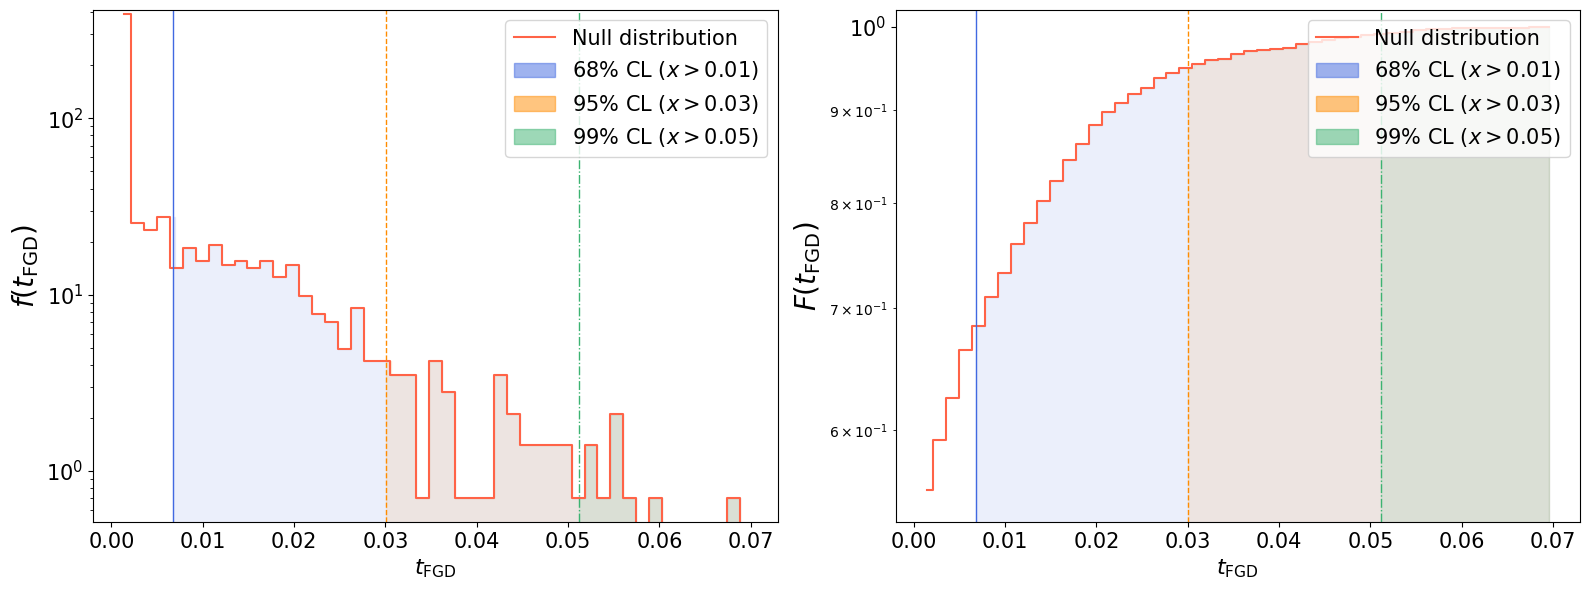

Time elapsed: 1.1358889220282435 seconds.
mu = -2.587710256321607e-05 +/- 4.005587837270488e-08
sigma = 0.0011254679441744504 +/- 3.538247679238423e-05
68%CL = 0.0003064592384323106, 95%CL = 0.0022134222741785337, 99%CL = 0.003765142111577191
mu = -2.587710256321607e-05 +/- 4.005587837270488e-08
sigma = 0.0011254679441744504 +/- 3.538247679238423e-05


/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


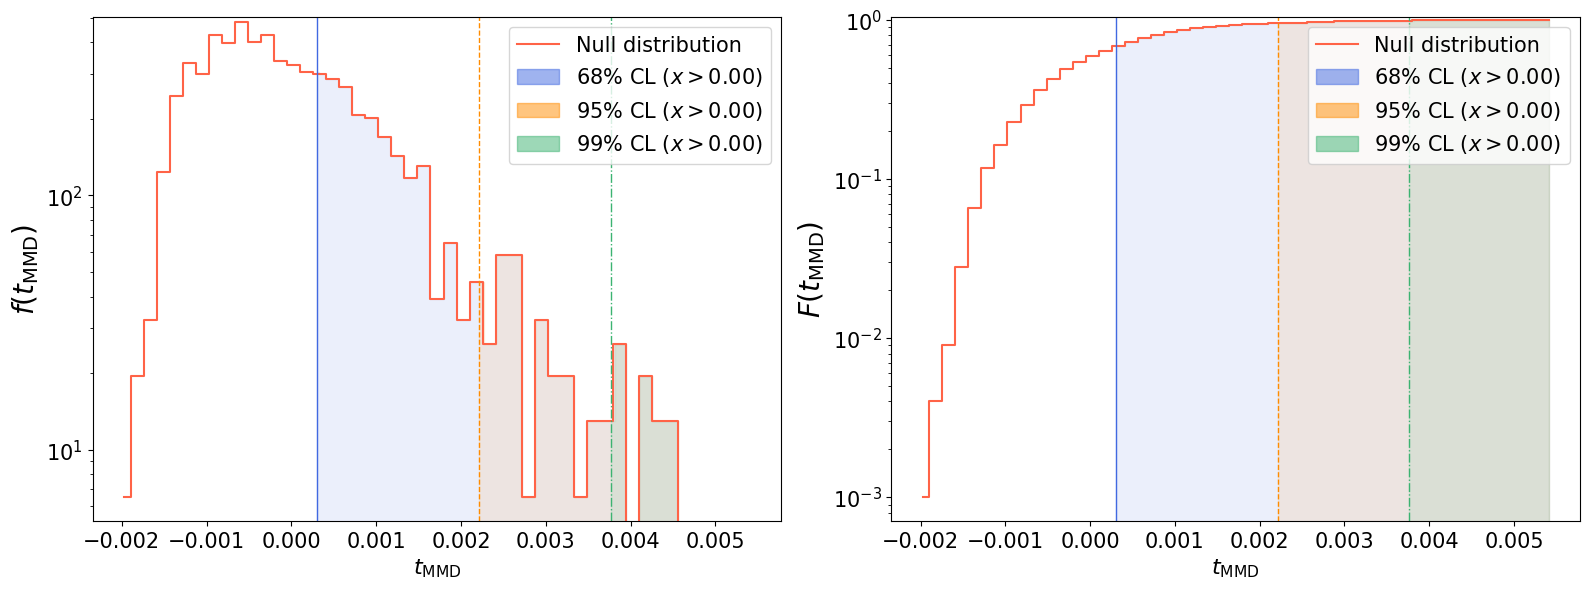

Time elapsed: 0.7739357999525964 seconds.
mu = 0.8625153827046681 +/- 0.000285336392648262
sigma = 0.09499015212666163 +/- 0.002394686804123268
68%CL = 0.8948830897895947, 95%CL = 1.0384259718035693, 99%CL = 1.1522702789679917
mu = 0.8625153827046681 +/- 0.000285336392648262
sigma = 0.09499015212666163 +/- 0.002394686804123268


/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


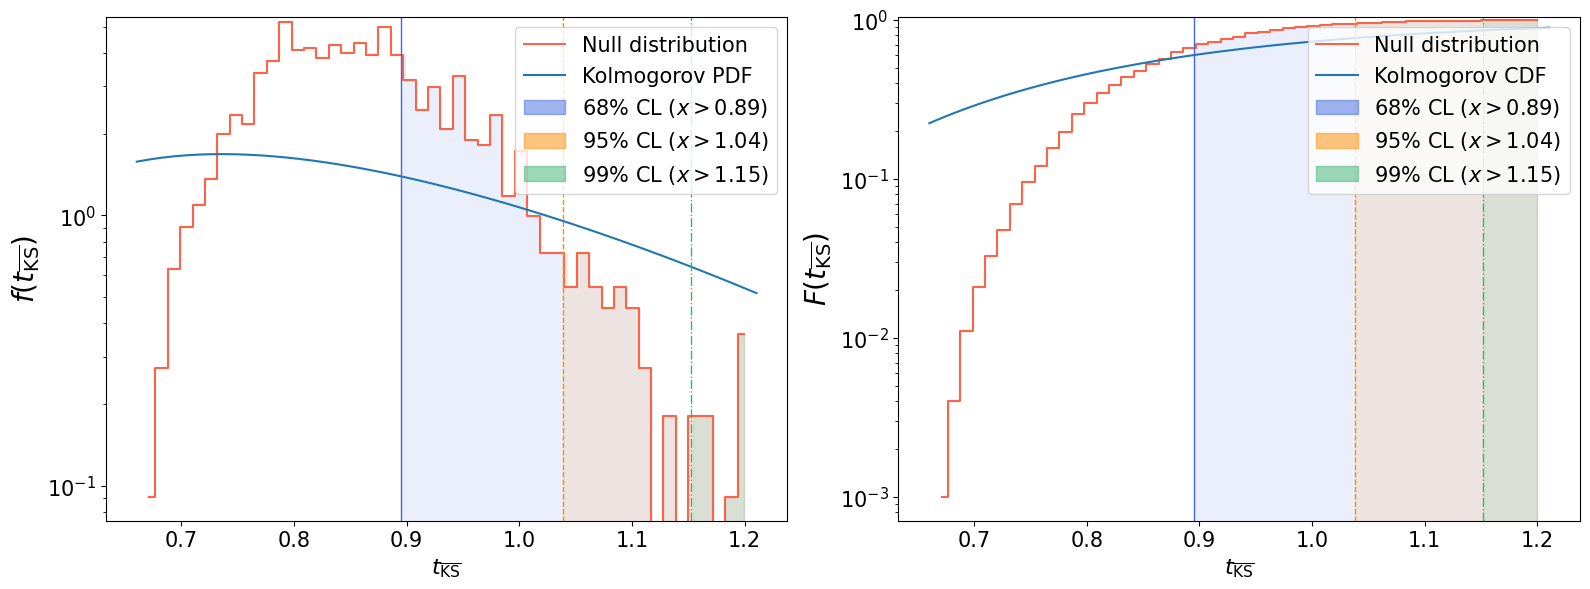

Time elapsed: 1.0655535478144884 seconds.
mu = 0.8608984181664175 +/- 0.00017142778530515775
sigma = 0.07362759372698809 +/- 0.002076647445779034
68%CL = 0.8838133546639745, 95%CL = 0.9970211068532517, 99%CL = 1.0990562563378974
mu = 0.8608984181664175 +/- 0.00017142778530515775
sigma = 0.07362759372698809 +/- 0.002076647445779034


/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


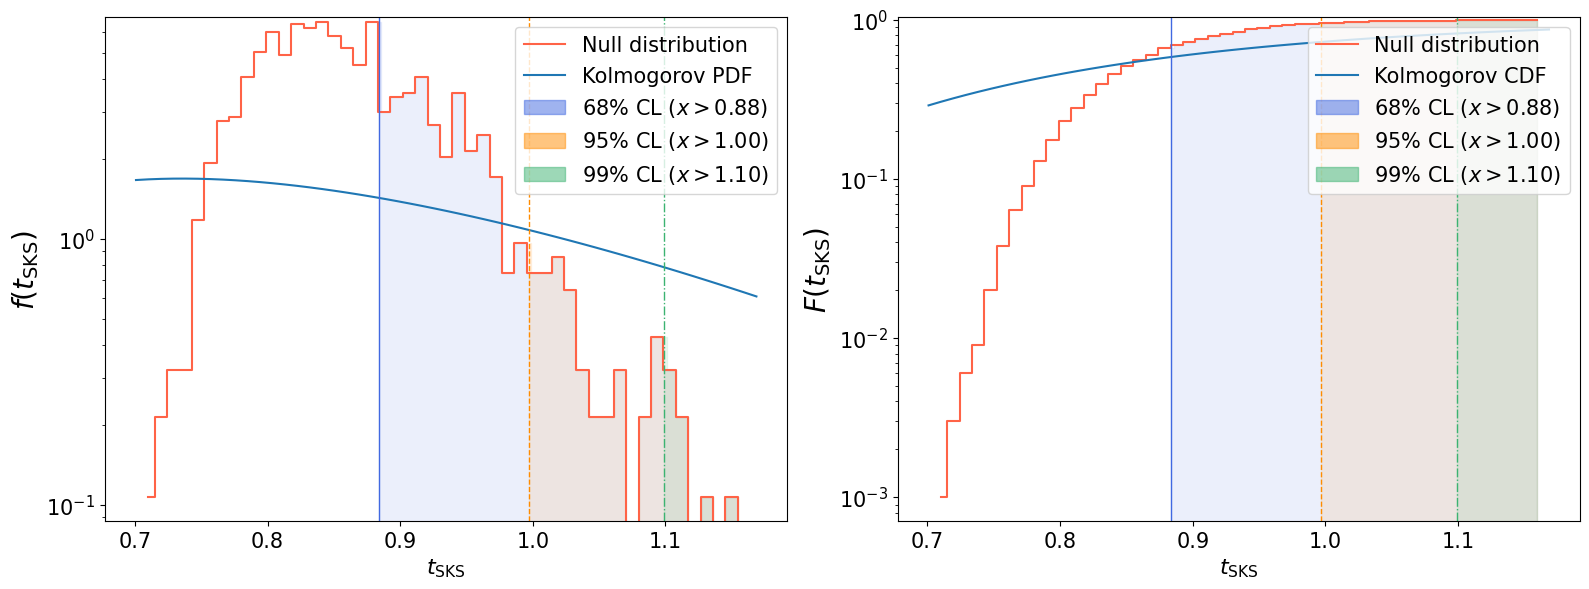

Time elapsed: 1.0395350828766823 seconds.
mu = 0.6438867023573623 +/- 0.00017184387682358854
sigma = 0.07371689444869206 +/- 0.0023426164710942327
68%CL = 0.664827208169045, 95%CL = 0.7856270839974411, 99%CL = 0.87576965836602
mu = 0.6438867023573623 +/- 0.00017184387682358854
sigma = 0.07371689444869206 +/- 0.0023426164710942327


/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


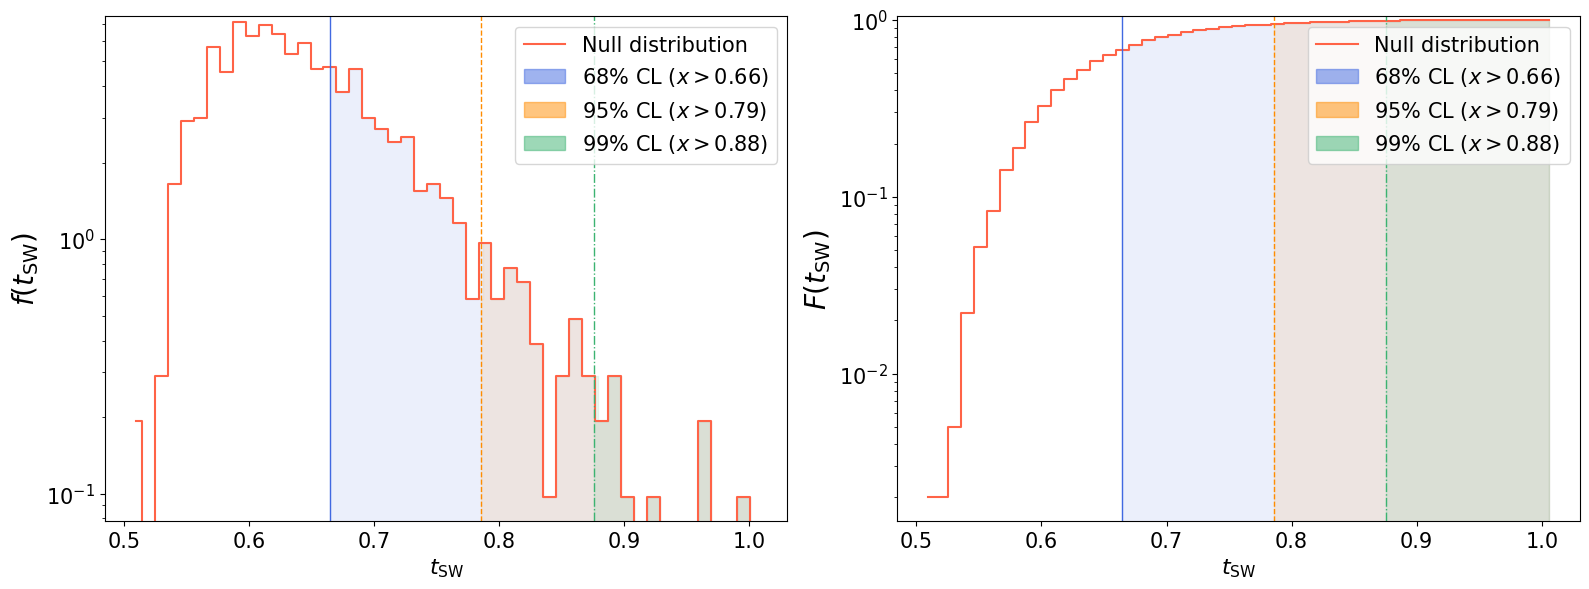

Time elapsed: 0.6894188672304153 seconds.
mu = 9707.288409783367 +/- 554.4372075884983
sigma = 132.41164584443644 +/- 2.9821721692971574
68%CL = 9769.94170856899, 95%CL = 9922.484041641175, 99%CL = 10013.384107776314
mu = 9707.288409783367 +/- 554.4372075884983
sigma = 132.41164584443644 +/- 2.9821721692971574


/tmp/ipykernel_1668946/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1668946/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1668946/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1668946/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


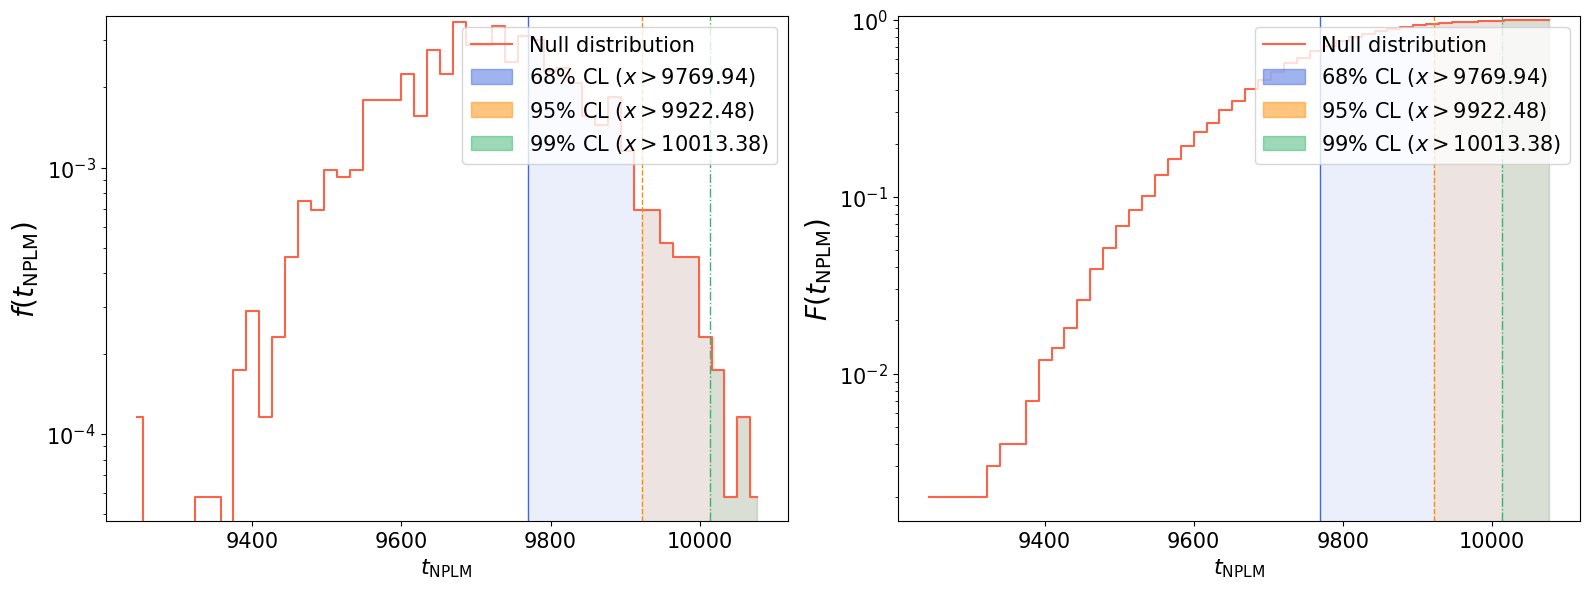

Time elapsed: 0.7171236551366746 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f604b043240>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\mathrm{FGD}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.006786811118848435], [0....",results/particle_features_30/tests/10K_preproc...
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f604b043060>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",8,t_{\mathrm{MMD}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.0003064592384323106], [0...",results/particle_features_30/tests/10K_preproc...
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f604b0416c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.8948830897895947], [0.95...",results/particle_features_30/tests/10K_preproc...
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f604b042520>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SKS}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.8838133546639745], [0.95...",results/particle_features_30/tests/10K_preproc...
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f604b0423e0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SW}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 0.664827208169045], [0.95,...",results/particle_features_30/tests/10K_preproc...
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 20000, 'lam': 1e-07, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f6047dc8540>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",1000,t_{\mathrm{NPLM}},results/particle_features_30/tests/10K_preproc...,"[[0.68, [680, 319], 9769.94170856899], [0.95, ...",results/particle_features_30/tests/10K_preproc...


In [26]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"$%s$" % latex, fontsize=16)
    ax[0].set_ylabel(r"$f(%s)$" % latex, fontsize=20)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"$%s$"%latex, fontsize=16)
    ax[1].set_ylabel(r"$F(%s)$" % latex, fontsize=20)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [22]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [23]:
# file_path = os.path.join(model_dir, "exclusion_limits.json")
# if os.path.exists(file_path):
#     try:
#         with open(file_path, "r") as file:
#             existing_data = json.load(file)
#     except json.JSONDecodeError:
#         existing_data = {}
# else:
#     existing_data = {}
    
# # Sort the dictionary by keys
# existing_data = dict(sorted(existing_data.items()))

# # Save the sorted dictionary back to a JSON file
# with open(file_path, 'w') as f:
#     json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

file_path = os.path.join(model_dir, f"exclusion_limits_M_{m_value}_lam_{lam_value}.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [24]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1  # Default starting value
    for bound in bounds:
        try:
            # Filter results for the current deformation and bound
            result = {
                k: v for k, v in existing_data.items()
                if v["null_config"]["name"] == nplm_config["name"]
                and v["deformation"] == deformation
                and v["bound"] == bound
            }
        except Exception:
            result = {}

        if result:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
            # Update eps_max to the last computed epsilon in the exclusion list
            last_result = list(result.values())[0]
            if last_result["exclusion_list"]:
                eps_max = last_result["exclusion_list"][-1][3]  # Last epsilon value
        else:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(
                dataset = dataset,
                metric_config=nplm_config,
                test_kwargs=test_kwargs,
                model_dir=model_dir,
                deformation=deformation,
                seed_dist=0,
                x_tol=0.01,
                fn_tol=0.05,
                bound=bound,
                eps_min=0.0,
                eps_max=eps_max,
                smear = 0.,
                max_iterations=50,
                save=True,
                filename=f"exclusion_limits_M_{m_value}_lam_{lam_value}.json",
                verbose=True
            )
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]  # Update eps_max
        global_results.update(result)

print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [25]:
import notebooks.shared as shared

In [26]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [27]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,NaN,$0.00376_{-0.0012}^{+0.00095}$,$0.00442_{-0.00092}^{+0.00092}$,$88275$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,NaN,$0.00773_{-0.0043}^{+0.002}$,$0.0092_{-0.0021}^{+0.002}$,$91699$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,NaN,$0.00935_{-0.0045}^{+0.0043}$,$0.0132_{-0.0063}^{+0.0037}$,$84893$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,NaN,$0.02109_{-0.011}^{+0.0081}$,$0.02773_{-0.0088}^{+0.0094}$,$88843$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,NaN,$0.17345_{-0.016}^{+0.012}$,$0.18108_{-0.011}^{+0.011}$,$62317$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,NaN,$0.05764_{-0.017}^{+0.01}$,$0.06644_{-0.013}^{+0.0083}$,$77062$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,NaN,$0.09943_{-0.028}^{+0.018}$,$0.11395_{-0.02}^{+0.014}$,$71648$


### Latex

In [28]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Scaled Particle features with $\\mathbf{n=m=10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00376_{-0.0012}^{+0.00095}$ & $0.00442_{-0.00092}^{+0.00092}$ & $88275$ & $0.00773_{-0.0043}^{+0.002}$ & $0.0092_{-0.0021}^{+0.002}$ & $91699$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00935_{-0.0045}^{+0.0043}$ & $0.0132_{-0.0063}^{+0.0037}$ & $84893$ & $0.02109_{-0.011}

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:554: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [29]:
shared.save_latex_nplm(tex_string, model_dir, f"results_table_M_{m_value}_lam_{lam_value}.tex")

LaTeX table code has been written to results/particle_features_30/tests/10K_preprocessed/results_table_M_20000_lam_1e-07.tex


In [32]:
import re

# Path to the old metrics results table
file_path_nplm_jetnet_old = "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/results/particle_features_30/tests/10K_preprocessed/results_table_hyper_par.tex"
with open(file_path_nplm_jetnet_old, 'r') as file:
    table_nplm_jetnet_old = file.read()


# Extract rows containing "$t_{\mathrm{NPLM}}$" and add coloring
nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
    if "$t_{\mathrm{NPLM}}$" in line:
        nplm_rows.append("\\rowcolor{green!35}"+line)

# Extract rows containing "$t_{\mathrm{NPLM}}$" with red coloring from the old table
nplm_old_rows_red = []
lines_nplm_old_red = table_nplm_jetnet_old.splitlines()
for line in lines_nplm_old_red:
    if "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" in line:
        nplm_old_rows_red.append(line)

# Extract rows containing "$t_{\mathrm{NPLM}}$" with red coloring from the old table
nplm_old_rows_blue = []
lines_nplm_old_blue = table_nplm_jetnet_old.splitlines()
for line in lines_nplm_old_blue:
    if "\\rowcolor{blue!35}	$t_{\mathrm{NPLM}}$" in line:
        nplm_old_rows_blue.append(line)

# Extract rows for SW, KS, SKS, FGD, MMD, and LLR metrics
sw_rows = []
lines_sw = table_nplm_jetnet_old.splitlines()
for line in lines_sw:
    if "$t_{\mathrm{SW}}$" in line:
        sw_rows.append(line)

ks_rows = []
lines_ks = table_nplm_jetnet_old.splitlines()
for line in lines_ks:
    if "$t_{\overline{\mathrm{KS}}}$" in line:
        ks_rows.append(line)

sks_rows = []
lines_sks = table_nplm_jetnet_old.splitlines()
for line in lines_sks:
    if "$t_{\mathrm{SKS}}$" in line:
        sks_rows.append(line)

fgd_rows = []
lines_fgd = table_nplm_jetnet_old.splitlines()
for line in lines_fgd:
    if "$t_{\mathrm{FGD}}$" in line:
        fgd_rows.append(line)

mmd_rows = []
lines_mmd = table_nplm_jetnet_old.splitlines()
for line in lines_mmd:
    if "$t_{\mathrm{MMD}}$" in line:
        mmd_rows.append(line)

# Process old lines and construct the updated table
lines_old = table_nplm_jetnet_old.splitlines()
new_lines = []
i = 0  # Index to track row additions

for line in lines_old:
    # Include lines unrelated to metrics
    if (
        "$t_{\\mathrm{SW}}$" not in line
        and "$t_{\\overline{\\mathrm{KS}}}$" not in line
        and "$t_{\\mathrm{SKS}}$" not in line
        and "$t_{\\mathrm{FGD}}$" not in line
        and "$t_{\\mathrm{MMD}}$" not in line
        and "$t_{\\mathrm{LLR}}$" not in line
        and "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" not in line
        and "\\rowcolor{blue!35}	$t_{\mathrm{NPLM}}$" not in line
    ):
        new_lines.append(line)
    elif "$t_{\\mathrm{SW}}$" in line:
        # Add SW line and append corresponding rows from other metrics
        new_lines.append(line)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_old_rows_red[i])
        new_lines.append(nplm_old_rows_blue[i])
        new_lines.append(nplm_rows[i])
        i = (i + 1)  # Ensure index doesn't exceed `nplm_rows` length
    else:
        pass

# Combine lines into the updated table
updated_table = "\n".join(new_lines)

# Print the updated table
print(updated_table)



\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.03001_{-0.012}^{+0.0061}$ & $0.03983_{-0.0068}^{+0.0059}$ & ${\mathbf{636}}$ & $0.03556_{-0.014}^{+0.013}$ & $0.04838_{-0.012}^{+0.01}$ & ${\mathbf{663}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.01913_{-0.0097}^{+0.0053}}}$ & ${\mathbf{0.02873_{-0.0066}^{+0.0044}}}$ & $772$ & $0.04819_{-0.026}^{+0.016}$ & $0.06797_{-0.016}^{+0.015}$ & $871$ \\
	$t_{\mathrm{SKS}}$ & $0.02745_{-0.011}^{+0.0048}$ & $0.03644_{-0.0062}^{+0.0054}$ & $1583$ & $0.04382_{-0.014}^{+0.021}$ & $0.0658_{-0.016}^{+0.01}$ & $1772$ \\
	$t_{\mathrm{FGD}}$ & $0.03709_{-0.013}^{+0.007

In [33]:
shared.save_latex_nplm(updated_table, model_dir, f"results_table_3_hyper_par_points.tex")

LaTeX table code has been written to results/particle_features_30/tests/10K_preprocessed/results_table_3_hyper_par_points.tex
